In [1]:
# Importing Libraries
import numpy as np
import cv2
import os

from PIL import Image

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import Dropout

In [2]:
# Defining Image Size
IMAGE_SHAPE = (224, 224)

In [3]:
# Defining the path of Dataset.
data_dir1 = "C:/Users/91740/Project/PlantVillage1"
data_dir2 = "C:/Users/91740/Project/PlantVillage2"
data_dir3 = "C:/Users/91740/Project/PlantVillage3"
import pathlib
# Initialising the path of directory
data_dir1 = pathlib.Path(data_dir1)
data_dir2 = pathlib.Path(data_dir2)
data_dir3 = pathlib.Path(data_dir3)

In [4]:
# Creating dictionary for clasification.
crop_images_dict1 = {
    'Bell_Pepper_Bacterial_Spot': list(data_dir1.glob('Bell_Pepper_Bacterial_Spot/*')),
    'Bell_Pepper_Healthy': list(data_dir1.glob('Bell_Pepper_Healthy/*')),
    'Potato_Early_Blight': list(data_dir1.glob('Potato_Early_Blight/*')),
    'Potato_Healthy': list(data_dir1.glob('Potato_Healthy/*')),
    'Potato_Late_Blight': list(data_dir1.glob('Potato_Late_Blight/*')),
    'Tomato_Bacterial_Spot': list(data_dir1.glob('Tomato_Bacterial_Spot/*')),
    'Tomato_Early_Blight': list(data_dir1.glob('Tomato_Early_Blight/*')),
    'Tomato_Healthy': list(data_dir1.glob('Tomato_Healthy/*')),
    'Tomato_Late_Blight': list(data_dir1.glob('Tomato_Late_Blight/*')),
    'Tomato_Septoria_Leaf_Spot': list(data_dir1.glob('Tomato_Septoria_Leaf_Spot/*')),
    'Tomato_YellowLeaf_Curl_Virus': list(data_dir1.glob('Tomato_YellowLeaf_Curl_Virus/*')),
}

In [5]:
crop_images_dict2 = {
    'Bell_Pepper_Bacterial_Spot': list(data_dir2.glob('Bell_Pepper_Bacterial_Spot/*')),
    'Bell_Pepper_Healthy': list(data_dir2.glob('Bell_Pepper_Healthy/*')),
    'Potato_Early_Blight': list(data_dir2.glob('Potato_Early_Blight/*')),
    'Potato_Healthy': list(data_dir2.glob('Potato_Healthy/*')),
    'Potato_Late_Blight': list(data_dir2.glob('Potato_Late_Blight/*')),
    'Tomato_Bacterial_Spot': list(data_dir2.glob('Tomato_Bacterial_Spot/*')),
    'Tomato_Early_Blight': list(data_dir2.glob('Tomato_Early_Blight/*')),
    'Tomato_Healthy': list(data_dir2.glob('Tomato_Healthy/*')),
    'Tomato_Late_Blight': list(data_dir2.glob('Tomato_Late_Blight/*')),
    'Tomato_Septoria_Leaf_Spot': list(data_dir2.glob('Tomato_Septoria_Leaf_Spot/*')),
    'Tomato_YellowLeaf_Curl_Virus': list(data_dir2.glob('Tomato_YellowLeaf_Curl_Virus/*')),
}

In [6]:
crop_images_dict3 = {
    'Bell_Pepper_Bacterial_Spot': list(data_dir3.glob('Bell_Pepper_Bacterial_Spot/*')),
    'Bell_Pepper_Healthy': list(data_dir3.glob('Bell_Pepper_Healthy/*')),
    'Potato_Early_Blight': list(data_dir3.glob('Potato_Early_Blight/*')),
    'Potato_Healthy': list(data_dir3.glob('Potato_Healthy/*')),
    'Potato_Late_Blight': list(data_dir3.glob('Potato_Late_Blight/*')),
    'Tomato_Bacterial_Spot': list(data_dir3.glob('Tomato_Bacterial_Spot/*')),
    'Tomato_Early_Blight': list(data_dir3.glob('Tomato_Early_Blight/*')),
    'Tomato_Healthy': list(data_dir3.glob('Tomato_Healthy/*')),
    'Tomato_Late_Blight': list(data_dir3.glob('Tomato_Late_Blight/*')),
    'Tomato_Septoria_Leaf_Spot': list(data_dir3.glob('Tomato_Septoria_Leaf_Spot/*')),
    'Tomato_YellowLeaf_Curl_Virus': list(data_dir3.glob('Tomato_YellowLeaf_Curl_Virus/*')),
}

In [7]:
# Creating labels
crop_labels_dict = {
    'Bell_Pepper_Bacterial_Spot': 0,
    'Bell_Pepper_Healthy': 1,
    'Potato_Early_Blight': 2,
    'Potato_Healthy': 3,
    'Potato_Late_Blight': 4,
    'Tomato_Bacterial_Spot': 5,
    'Tomato_Early_Blight': 6,
    'Tomato_Healthy': 7,
    'Tomato_Late_Blight': 8,
    'Tomato_Septoria_Leaf_Spot': 9,
    'Tomato_YellowLeaf_Curl_Virus': 10,
}

In [8]:
# Defining imput as X and output as y.
X1, y1 = [], []

for crop_name, images in crop_images_dict1.items():
    for image in images:
            try:
                img = cv2.imread(str(image))
                resized_img = cv2.resize(img,IMAGE_SHAPE)
                X1.append(resized_img)
                y1.append(crop_labels_dict[crop_name])
            except Exception as e:
                pass

In [9]:
# Conveting into numpy arrays.
X1 = np.array(X1)
y1 = np.array(y1)

In [10]:
# Splitting dataset into training and test set.
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, random_state=0,test_size=0.20)

In [11]:
# Normalizing input in range 0 to 1.
X_train1 = X_train1/255.0
X_test1 = X_test1/255.0

In [12]:
# Loading pretrained model
#feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
feature_extractor_model = hub.load("//DESKTOP-2PDCGP5/Users/91740/Project/mobilenet_v2_feature_vector_4")
pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224,224,3), trainable=False
)

In [13]:
# Adding Dense layers for classification other than pretrained model layers.
num_of_crops = 11

model = tf.keras.Sequential([
    pretrained_model_without_top_layer,
    tf.keras.layers.Dense(2*num_of_crops, activation='relu'),
    tf.keras.layers.Dense(num_of_crops),
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 22)                28182     
                                                                 
 dense_1 (Dense)             (None, 11)                253       
                                                                 
Total params: 2,286,419
Trainable params: 28,435
Non-trainable params: 2,257,984
_________________________________________________________________


In [14]:
# Compiling and fitting the model.
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['acc']
)

In [15]:
history = model.fit(X_train1, y_train1, validation_data=(X_test1, y_test1), epochs=10)

Epoch 1/10
142/142 [==============================] - 125s 855ms/step - loss: 0.9298 - acc: 0.7154 - val_loss: 0.4781 - val_acc: 0.8523
Epoch 2/10
142/142 [==============================] - 104s 736ms/step - loss: 0.3549 - acc: 0.8921 - val_loss: 0.3257 - val_acc: 0.9063
Epoch 3/10
142/142 [==============================] - 100s 708ms/step - loss: 0.2406 - acc: 0.9295 - val_loss: 0.2781 - val_acc: 0.9116
Epoch 4/10
142/142 [==============================] - 108s 758ms/step - loss: 0.1771 - acc: 0.9518 - val_loss: 0.2241 - val_acc: 0.9248
Epoch 5/10
142/142 [==============================] - 105s 744ms/step - loss: 0.1392 - acc: 0.9655 - val_loss: 0.1994 - val_acc: 0.9363
Epoch 6/10
142/142 [==============================] - 101s 711ms/step - loss: 0.1122 - acc: 0.9706 - val_loss: 0.2172 - val_acc: 0.9266
Epoch 7/10
142/142 [==============================] - 97s 686ms/step - loss: 0.0903 - acc: 0.9823 - val_loss: 0.1830 - val_acc: 0.9390
Epoch 8/10
142/142 [=============================

In [16]:
del X_train1,y_train1,X_test1,y_test1

In [17]:
# Defining imput as X and output as y.
X2, y2 = [], []

for crop_name, images in crop_images_dict2.items():
    for image in images:
            img = cv2.imread(str(image))
            resized_img = cv2.resize(img,IMAGE_SHAPE)
            X2.append(resized_img)
            y2.append(crop_labels_dict[crop_name])

In [18]:
X2 = np.array(X2)
y2 = np.array(y2)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, random_state=0,test_size=0.20)
X_train2 = X_train2/255.0
X_test2 = X_test2/255.0

In [19]:
history = model.fit(X_train2, y_train2, validation_data=(X_test2, y_test2), epochs=10)

Epoch 1/10
143/143 [==============================] - 118s 823ms/step - loss: 0.2328 - acc: 0.9222 - val_loss: 0.2239 - val_acc: 0.9253
Epoch 2/10
143/143 [==============================] - 125s 877ms/step - loss: 0.1380 - acc: 0.9523 - val_loss: 0.1819 - val_acc: 0.9367
Epoch 3/10
143/143 [==============================] - 141s 983ms/step - loss: 0.0976 - acc: 0.9701 - val_loss: 0.1975 - val_acc: 0.9323
Epoch 4/10
143/143 [==============================] - 119s 835ms/step - loss: 0.0736 - acc: 0.9798 - val_loss: 0.1790 - val_acc: 0.9394
Epoch 5/10
143/143 [==============================] - 144s 1s/step - loss: 0.0560 - acc: 0.9879 - val_loss: 0.1618 - val_acc: 0.9482
Epoch 6/10
143/143 [==============================] - 127s 892ms/step - loss: 0.0447 - acc: 0.9921 - val_loss: 0.1772 - val_acc: 0.9446
Epoch 7/10
143/143 [==============================] - 110s 772ms/step - loss: 0.0362 - acc: 0.9941 - val_loss: 0.1526 - val_acc: 0.9552
Epoch 8/10
143/143 [==============================]

In [20]:
del X_train2,y_train2,X_test2,y_test2

In [21]:
# Defining imput as X and output as y.
X3, y3 = [], []

for crop_name, images in crop_images_dict3.items():
    for image in images:
            img = cv2.imread(str(image))
            resized_img = cv2.resize(img,IMAGE_SHAPE)
            X3.append(resized_img)
            y3.append(crop_labels_dict[crop_name])

In [22]:
X3 = np.array(X3)
y3 = np.array(y3)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, random_state=0,test_size=0.20)
X_train3 = X_train3/255.0
X_test3 = X_test3/255.0

In [23]:
history = model.fit(X_train3, y_train3, validation_data=(X_test3, y_test3), epochs=10)

Epoch 1/10
141/141 [==============================] - 139s 983ms/step - loss: 0.2290 - acc: 0.9274 - val_loss: 0.1787 - val_acc: 0.9412
Epoch 2/10
141/141 [==============================] - 124s 885ms/step - loss: 0.1173 - acc: 0.9581 - val_loss: 0.2160 - val_acc: 0.9261
Epoch 3/10
141/141 [==============================] - 137s 973ms/step - loss: 0.0875 - acc: 0.9717 - val_loss: 0.1831 - val_acc: 0.9377
Epoch 4/10
141/141 [==============================] - 127s 905ms/step - loss: 0.0601 - acc: 0.9846 - val_loss: 0.1841 - val_acc: 0.9412
Epoch 5/10
141/141 [==============================] - 139s 990ms/step - loss: 0.0390 - acc: 0.9909 - val_loss: 0.1616 - val_acc: 0.9448
Epoch 6/10
141/141 [==============================] - 115s 816ms/step - loss: 0.0315 - acc: 0.9949 - val_loss: 0.1692 - val_acc: 0.9412
Epoch 7/10
141/141 [==============================] - 116s 822ms/step - loss: 0.0246 - acc: 0.9960 - val_loss: 0.1746 - val_acc: 0.9439
Epoch 8/10
141/141 [============================

In [24]:
del X_train3, X_test3, y_train3, y_test3

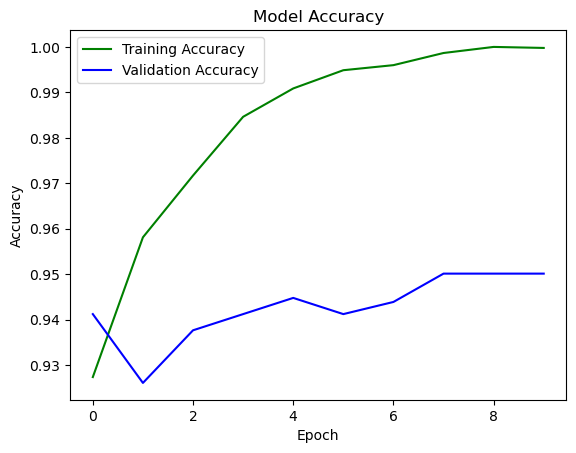

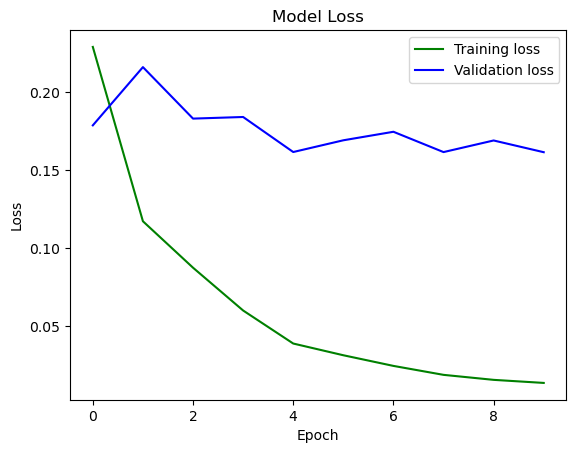

In [25]:
# summarize history for accuracy
plt.plot(history.history['acc'], 'g', label='Training Accuracy')
plt.plot(history.history['val_acc'], 'b', label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()
# summarize history for loss
plt.plot(history.history['loss'], 'g', label='Training loss')
plt.plot(history.history['val_loss'], 'b', label='Validation loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [26]:
# Predicting for some specific input.
#predicted = (model.predict(np.array([X_test1[40]])))
#predicted = np.argmax(predicted, axis=1)
# Predicted result
#predicted

In [27]:
# Original result
#print(y_test1[40])